In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
import cv2
import numpy as np
import os
from random import shuffle
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
TRAIN_DIR = 'D:/AA Desktop/Stuff/Research/College/Data Augmentation/11Data/1. Images for Training/Combined_128X128/Mixed_Images_With_GAN_Transfer_Learning/Combined_Original_And_Transfer_Learning_GAN_Generated'
IMG_SIZE = 128

In [5]:
def label_img(img):
    word_label = img.split(' ')[0]
    if word_label == 'NORMAL': return [1.0, 0.0]
    elif word_label == 'Viral': return [0.0, 1.0] 

In [6]:
def create_train_data():
    training_data = []
    for img in os.listdir(TRAIN_DIR):
                label = label_img(img)
                path = os.path.join(TRAIN_DIR, img)
                img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
                training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('D:/AA Desktop/Stuff/Research/College/Data Augmentation/11Data/1. Images for Training/Combined_128X128/Mixed_Images_With_GAN_Transfer_Learning/train_data_GAN_Transfer_Learning.npy', training_data)
    return training_data

In [7]:
train_data = create_train_data()
#if already exists
#train_data = np.load('D:/AA Desktop/Stuff/Research/College/Data Augmentation/11Data/1. Images for Training/Combined_128X128/Mixed_Images_With_GAN_Transfer_Learning/train_data_GAN_Transfer_Learning.npy')

C:\Users\Public\anaconda3\envs\gpuenv\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [8]:
model = Sequential()

In [9]:
#if exists
#model.load('D:/AA Desktop/Stuff/Research/College/Data Augmentation/11Data/1. Images for Training/Combined_128X128//Mixed_Images_With_GAN_Transfer_Learning/CNN_With_Transfer_Learning_GAN_Generated_X-Ray_Data.h5')

In [10]:
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [11]:
X = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array([i[1] for i in train_data])

In [12]:
model.compile(SGD(learning_rate = 0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X, Y, validation_split = 0.01, epochs = 10, batch_size = 64, verbose = 1, shuffle = 1)

Train on 4633 samples, validate on 47 samples
Epoch 1/10
4633/4633 [==============================] - 14s 3ms/sample - loss: 1.0077 - accuracy: 0.5992 - val_loss: 0.4947 - val_accuracy: 0.7872
Epoch 2/10
4633/4633 [==============================] - 5s 1ms/sample - loss: 0.3619 - accuracy: 0.8450 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 3/10
4633/4633 [==============================] - 5s 1ms/sample - loss: 0.1748 - accuracy: 0.9342 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 4/10
4633/4633 [==============================] - 5s 1ms/sample - loss: 0.1442 - accuracy: 0.9473 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 5/10
4633/4633 [==============================] - 5s 1ms/sample - loss: 0.1208 - accuracy: 0.9562 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 6/10
4633/4633 [==============================] - 5s 1ms/sample - loss: 0.1021 - accuracy: 0.9614 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 7/10
4633/4633 [==============================] - 5s 1ms/sample - loss:

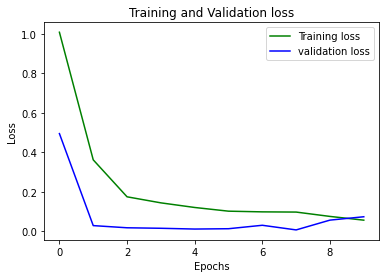

In [14]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

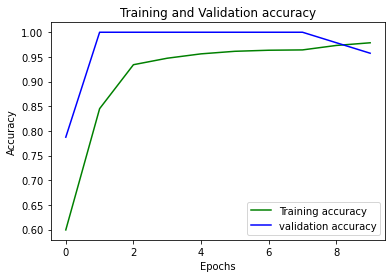

In [15]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
model.save('D:/AA Desktop/Stuff/Research/College/Data Augmentation/11Data/1. Images for Training/Combined_128X128/Mixed_Images_With_GAN_Transfer_Learning/CNN_With_Transfer_Learning_GAN_Generated_X-Ray_Data.h5')